**Hugo Riffaud de Turckheim : 3800256**
**Charline Curaut : 3810013**




# Practical work 2 : Fourier transform

This practial work is dedicated to the study of the discrete Fourier transform applied on the two following images:
![son.png](./img/son.png)
![sonrot.png](./img/sonrot.png)
and analyze the properties of their spectrum. To this end, we make use of the following functions provided by the module `numpy.fft`:

- `fft2()` to compute the Fourier transform on an image
- `fftshift()` to center the low frequencies
- `abs()` (from `numpy`) to compute the module of a complexe array

In most of cases, high frequencies have lower energy compare to low frequencies. We will use a logarithmic scale by applying $\log(1+abs(TF))$ to display the spectrum.

In [11]:
import numpy as np
from numpy.fft import fft2,fftshift
from PIL import Image
import matplotlib.pyplot as plt

son = np.array(Image.open('img/son.png'))
sonrot = np.array(Image.open('img/sonrot.png'))

## Exercice: properties of Fourier transform applied on natural images
1. Write the following functions:
 - `computeFT(I)` returning the Fourier transform of image `I`,
 - `toVisualizeFT(If)` returning the centered module of a complex array `If` (the Fourier transform of an image),
 - `toVisualizeLogFT(If)` similar to the previous function but use a logarithmic scale.

In [156]:
w,h=400,400

def computeFT(I):
    """ Array -> Array[complex] """
    return np.fft.fft2(I)

def toVisualizeFT(I,If):
    """ Array[complex] -> Array[float] """
    fig = plt.figure(constrained_layout=True,figsize=(w/20,h/20))
    axs = (fig
       .subplots(1, 3, sharex=True, sharey=True))
    axs[0].imshow(I,cmap='gray')
    axs[0].set_title('original image')
    axs[1].imshow(np.absolute(np.fft.fftshift(If)),cmap='gray')
    axs[1].set_title('FFT')
    axs[2].imshow(np.log(1+np.absolute(np.fft.fftshift(If))),cmap='PuRd')
    axs[2].set_title('Logarithmic FFT')




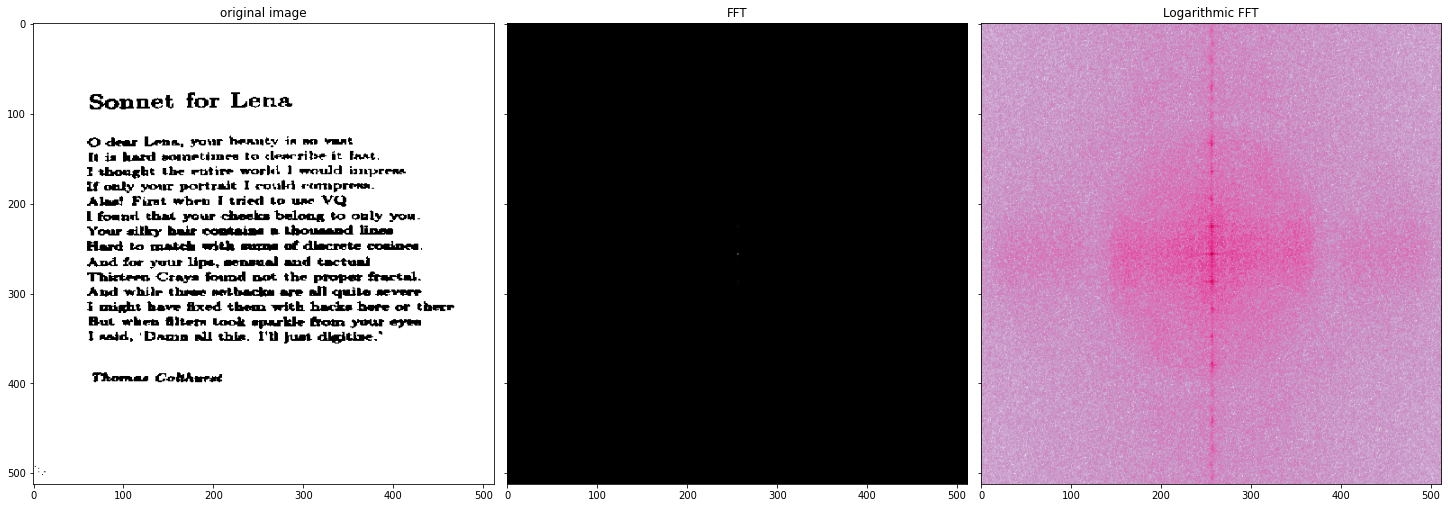

In [157]:
toVisualizeFT(son,computeFT(son))

2. Write a series of instructions that
 - compute the Fourier transform of `son` and `sonrot`,
 - compute and display the module using a logarithmic scale,
 - threshold the module with a parameter of $1.10^5$ (use the function of TME1)
 - display the thresholded spectrum

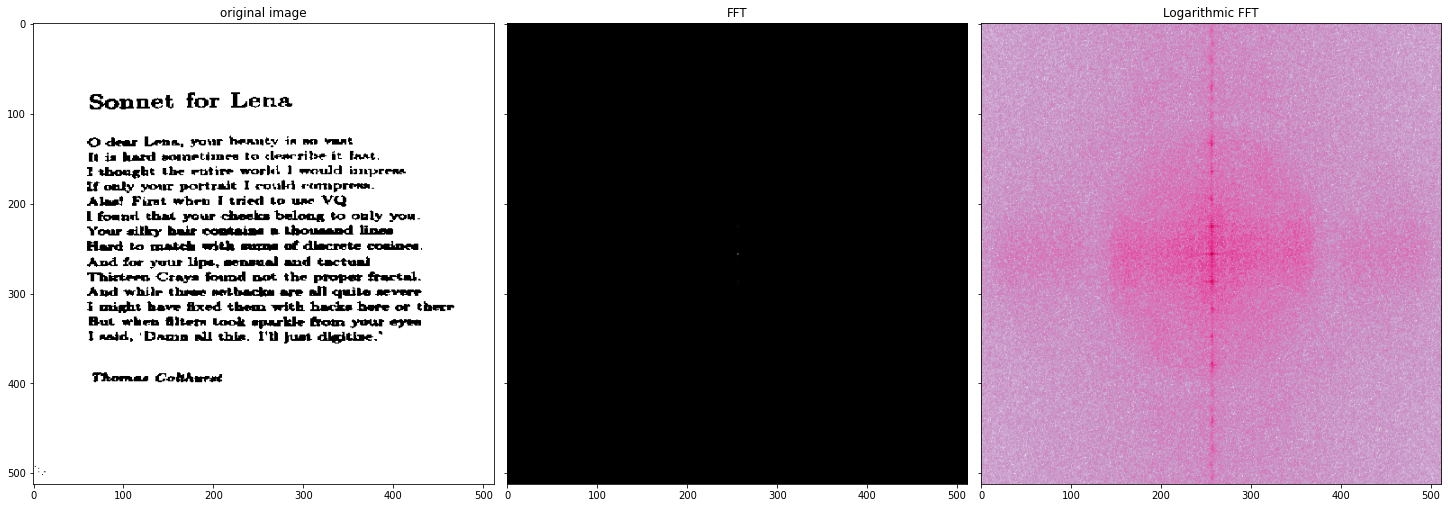

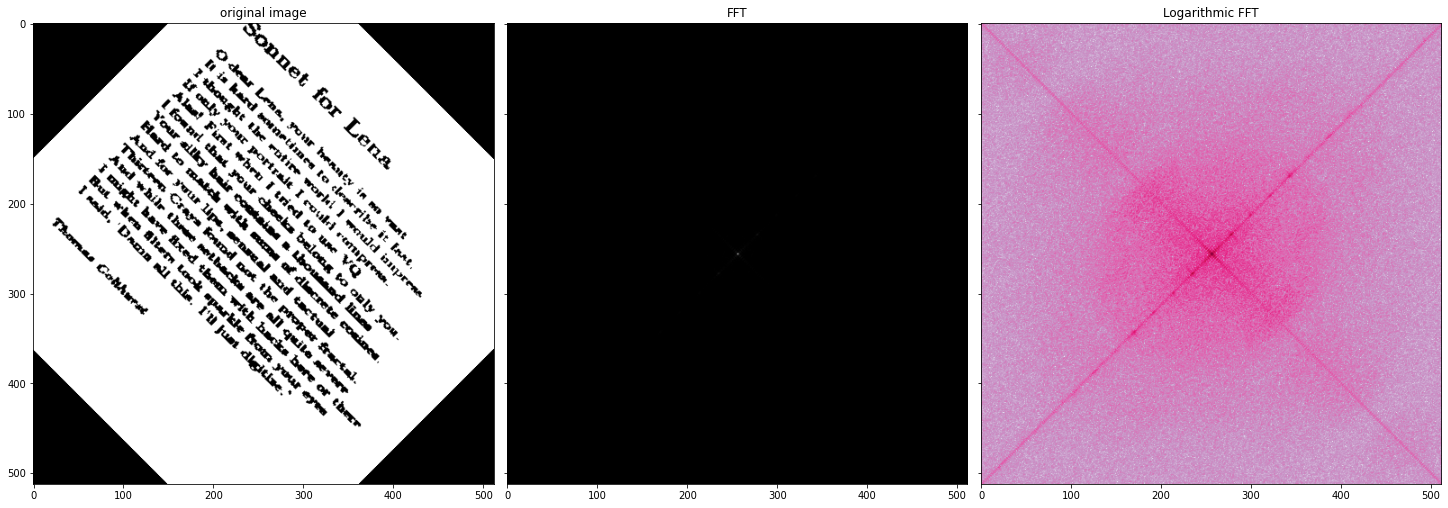

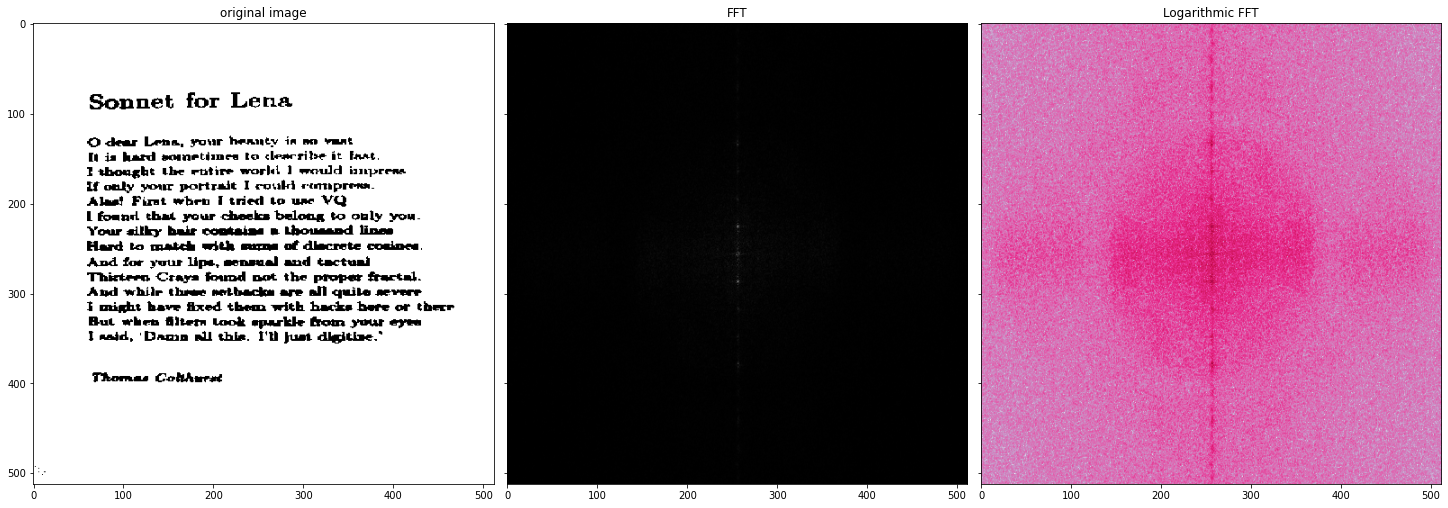

In [86]:
def thresholdImage(I,s):
    """ Array*int -> Array """
    return np.where(I<s,I,s)


ftson=computeFT(son)
ftsonrot=computeFT(sonrot)

toVisualizeFT(son,ftson)
toVisualizeFT(sonrot,ftsonrot)
toVisualizeFT(son,thresholdImage(ftson,1e5))


3. Interpretation: discuss the results obtained on thresholded FT module. What property of the Fourier transform is shown ?

In [87]:
#On constate qu'l y  a bcp plus de petites fréquences que de grandes fréquences

4. Write the function `blend()` getting two images, one float parameter $\alpha\in[0,1]$, calculating $\alpha I_1+(1-\alpha)I_2$ and returning the result. 

In [88]:
def blend(I1,I2,alpha):
    """ Array**2*float -> Array """
    return (alpha * I1) + ((1-alpha) * I2)?


Text(0.5, 1.0, 'blend son and sonrot')

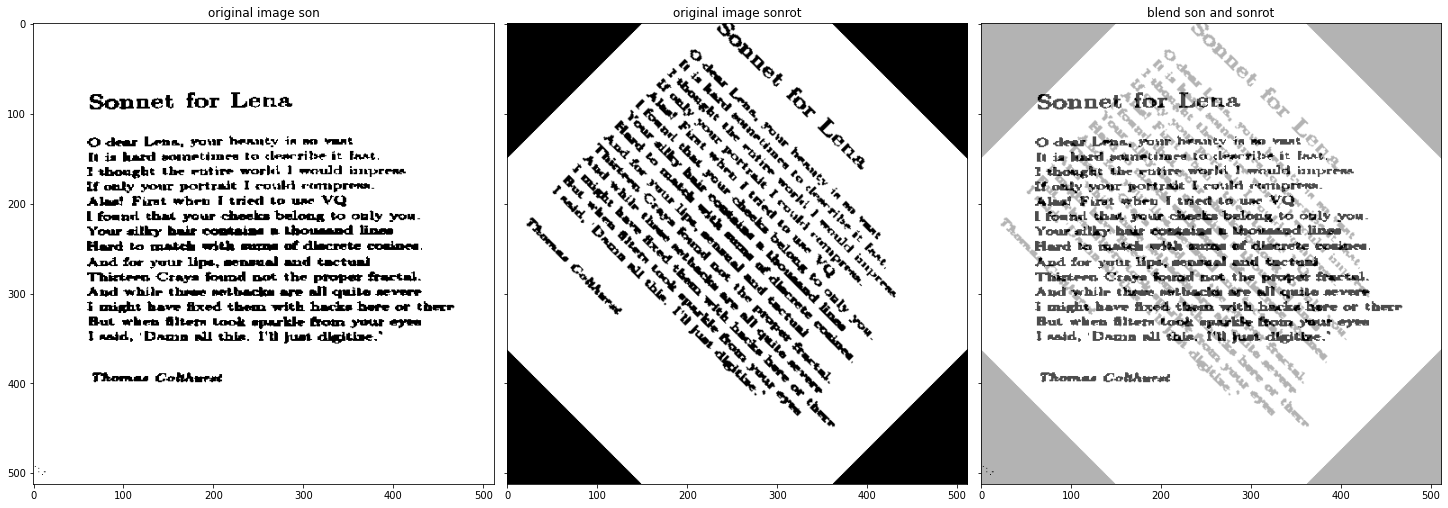

In [95]:
fig = plt.figure(constrained_layout=True,figsize=(w/20,h/20))
axs = (fig
    .subplots(1, 3, sharex=True, sharey=True))
axs[0].imshow(son,cmap='gray')
axs[0].set_title('original image son')
axs[1].imshow(sonrot,cmap='gray')
axs[1].set_title('original image sonrot')
axs[2].imshow(blend(son, sonrot, 0.7),cmap='gray')
axs[2].set_title('blend son and sonrot')

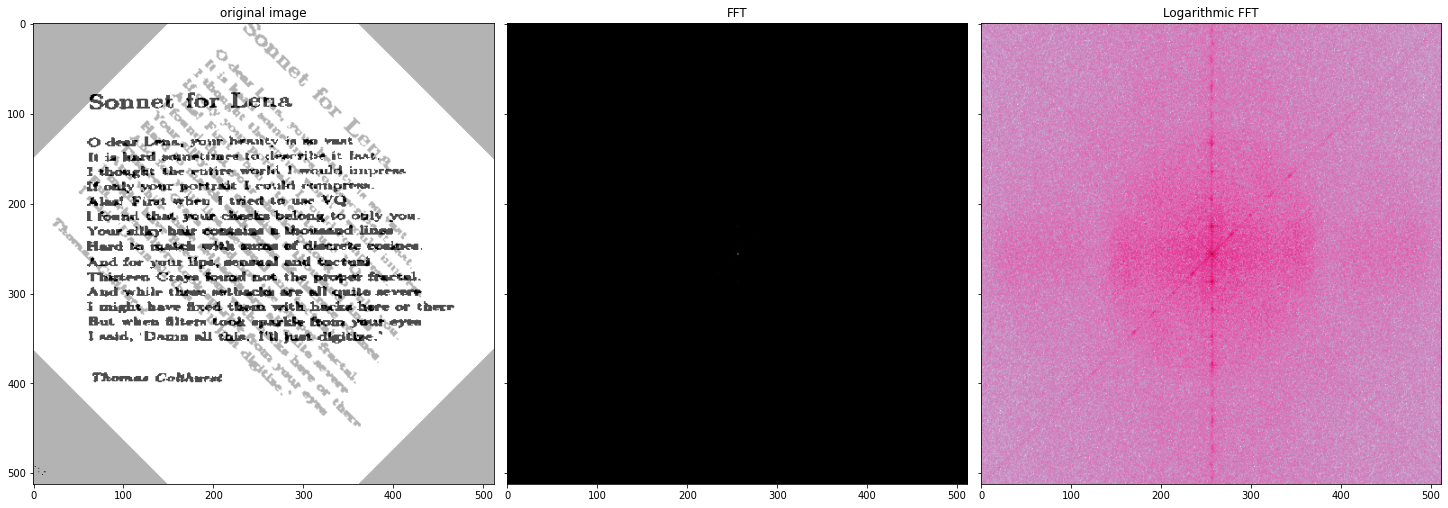

In [109]:
toVisualizeFT(blend(son, sonrot, 0.7),computeFT(blend(son, sonrot, 0.7)))

5. Apply the previous function on images `son` and `sonrot` and $\alpha=\frac12$, compute the Fourier transform, threshold the module and visualize the result. 

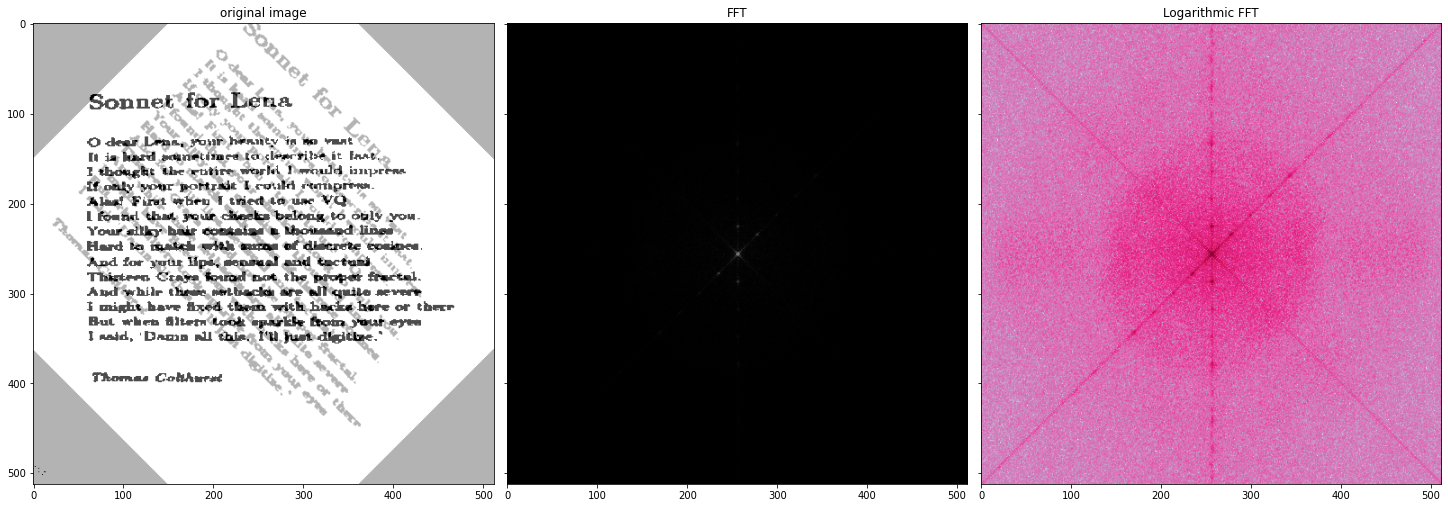

In [110]:
toVisualizeFT(blend(son, sonrot, 0.7),thresholdImage(computeFT(blend(son, sonrot, 0.5)),1e6))

6. Compare the latter result with those of question 2: what property of the Fourier transform is shown? What is the behaviour of $\alpha$ in the resulting spectrum?

7. We want to determine the text orientation in image `sonrot` and produce a new image with horizontal text. Write the function `rectifyOrientation()` that:

 + computes the FT module of image given in parameter and threshold it at $3\times 10^{5}$,
 + from thresholded module determines the main orientation using the function `mainOrientation()` 
 + produces the rectified image applying a rotation with a suitable angle using `rotateImage()`

In [173]:
def mainOrientation(I):
    """ Array -> tuple[Iori,float]
        return image of orientation (32 bins) and the main orientation (degree) from a Fourier transform module
    """
    n, m = I.shape

    size = 32
    x = np.array(range(size))
    ori = np.vstack((np.cos(np.pi*x/size), np.sin(np.pi*x/size))).T

    Iori = np.zeros((n, m))
    orients = np.zeros((size))

    for i in range(1,n+1):
        for j in range(1,m+1):
            if I[i-1, j-1] > 0:
                v = np.array([j-m/2, -i + n/2])
                if i > n/2:
                    v = -v
                    prod = np.matmul(ori, v)
                    maxi = prod.max()
                    if maxi > 0:
                        imax = np.nonzero(prod == maxi)
                        Iori[i-1, j-1] = imax[0]
                        orients[imax] += 1

    maxori = np.nonzero(orients == orients.max())[0][0]
    return (Iori, 180*maxori/size - 90)

def rotateImage(I,a):
    """ Array*float -> Array 
        return a rotation of angle a (degree) of image I
    """
    return np.array(Image.fromarray(I).rotate(a, expand=True, fillcolor=127))

def rectifyOrientation(I):
    print(mainOrientation(thresholdImage(computeFT(I),3e20))[1])
    

    return rotateImage(I,np.abs(mainOrientation(thresholdImage(computeFT(I),3e5))[1]))



45.0


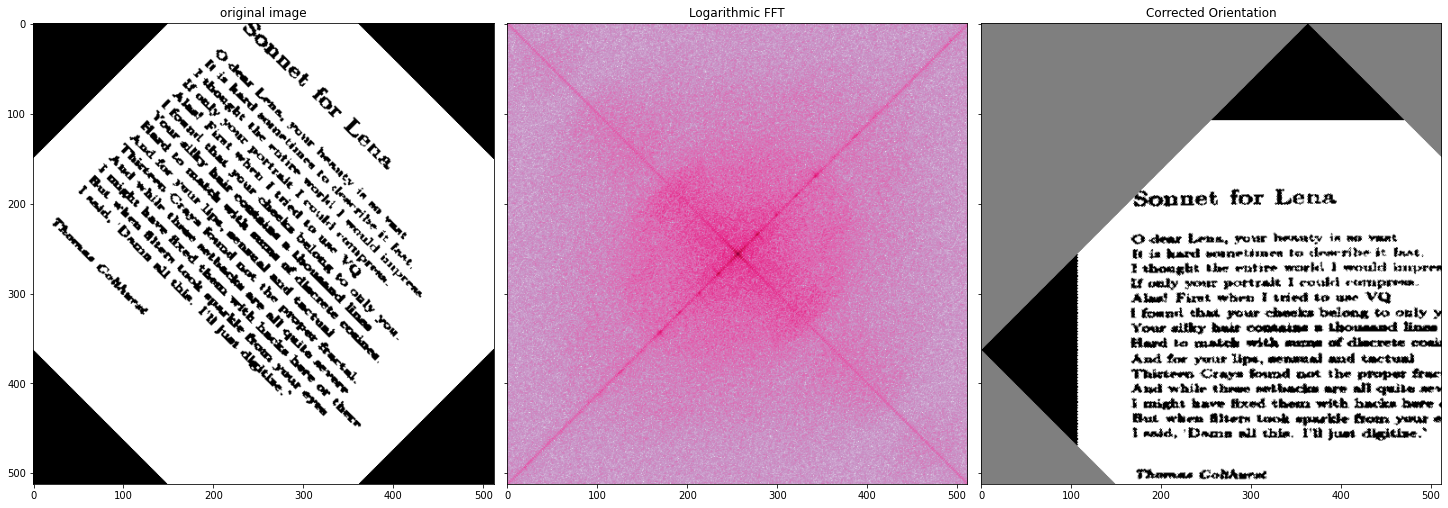

In [166]:
def visualizeCorrectOrientation(I):
    fig = plt.figure(constrained_layout=True,figsize=(w/20,h/20))
    axs = (fig
       .subplots(1, 3, sharex=True, sharey=True))
    axs[0].imshow(I,cmap='gray')
    axs[0].set_title('original image')
    axs[2].imshow(rectifyOrientation(I),cmap='gray')
    axs[2].set_title('Corrected Orientation')
    axs[1].imshow(np.log(1+np.absolute(np.fft.fftshift(computeFT(I)))),cmap='PuRd')
    axs[1].set_title('Logarithmic FFT')
    
visualizeCorrectOrientation(sonrot)

8. Experiment `rectifyOrientation()` on `sinrot`, and on a rotation of `img/port.jpg` (using `rotateImage()`) with various rotation angles.  

-45.0
84.375


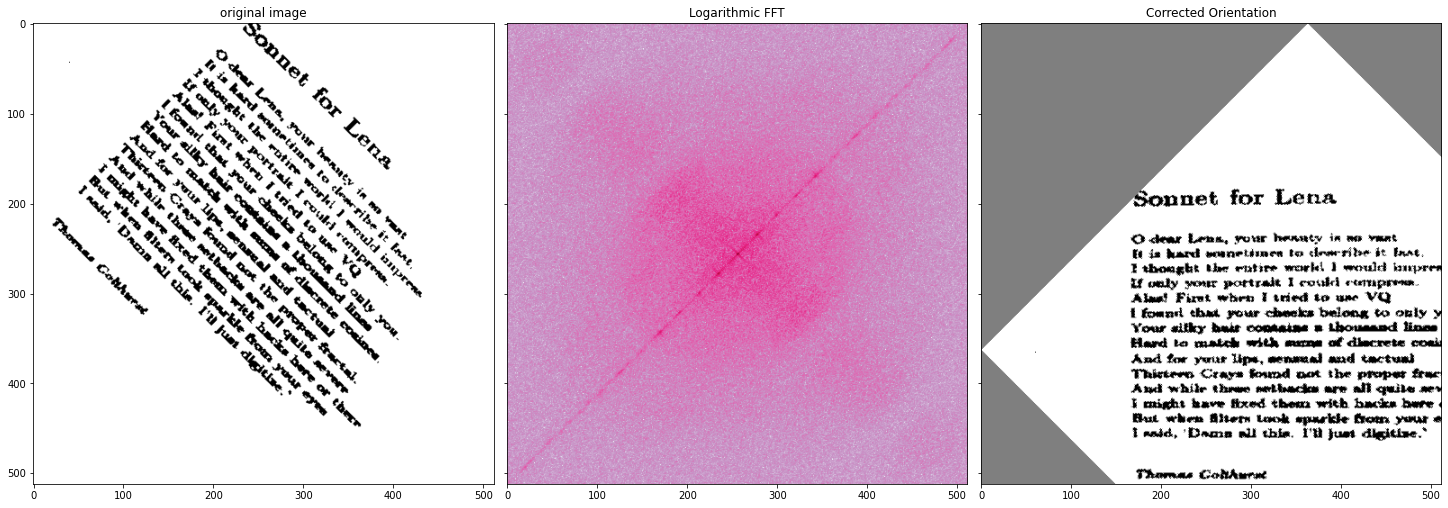

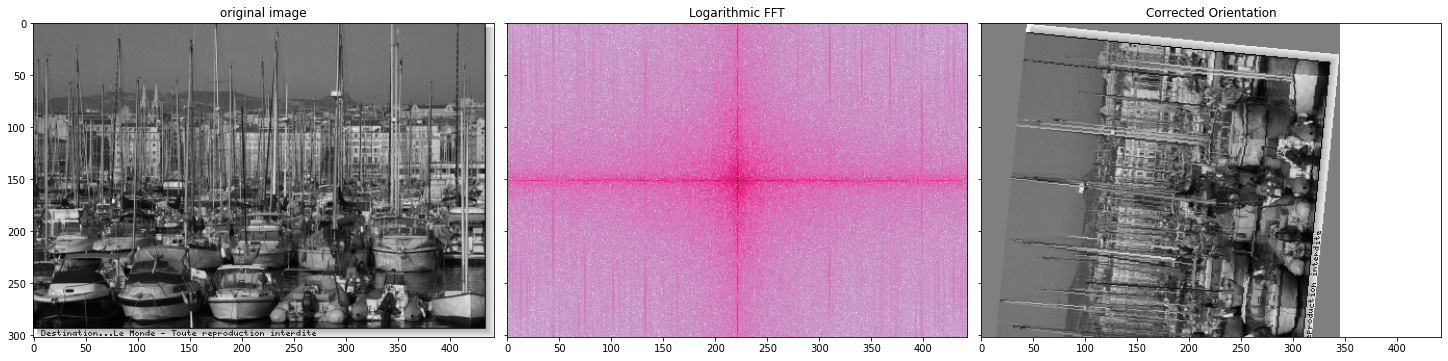

In [174]:
port = np.array(Image.open('img/port.jpg'))
sonrot2 = np.array(Image.open('img/sonrot2.png'))


visualizeCorrectOrientation(sonrot2)
visualizeCorrectOrientation(rotateImage(port,0))